# Домашнее задание № 8

### Выполнил Кузнецов С.И.

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Выгружаем датасет

In [2]:
boston = load_boston()
data = pd.DataFrame(data = boston.data, columns=boston.feature_names)
data['target'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Разобьем выборку на обучающую и тестовую

In [4]:
test_ind = set(np.random.choice(data.index, size = round(data.shape[0] * .2), replace = False))
data_train = data.loc[set(data.index) - test_ind]
data_test = data.loc[test_ind]

X_train = data_train.drop('target', axis = 1)
y_train = data_train.target
X_test = data_test.drop('target', axis = 1)
y_test = data_test.target

print(' Train dataset size: {}\n Test dataset size:   {}'.format(data_train.shape[0], data_test.shape[0]))

 Train dataset size: 405
 Test dataset size:   101


## Проведем стандартизацию

In [5]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

## Построим регрессию методом Лассо

In [6]:
lr = Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
gs_lr = GridSearchCV(lr, params, scoring='r2', cv = 10)

In [7]:
gs_lr.fit(X_train, y_train)

/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [8]:
lr_final = gs_lr.best_estimator_
lr_final.fit(X_train, y_train)
print('Lasso: R^2 = {:.4f}'.format(r2_score(y_test, lr_final.predict(X_test))))

Lasso: R^2 = 0.8248


## Построим регрессию, используя дерево решений

In [9]:
dt = DecisionTreeRegressor()
params = {'max_depth' : list(np.arange(2, 11)),
         'min_samples_split': [2, 5, 10, 50, 100],
         'min_weight_fraction_leaf': [0., 0.01, 0.05, 0.1, 0.5]}

gs_dt = GridSearchCV(dt, params, scoring='r2', cv = 5)

In [10]:
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 5, 10, 50, 100], 'min_weight_fraction_leaf': [0.0, 0.01, 0.05, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [11]:
dt_final = gs_dt.best_estimator_
dt_final.fit(X_train, y_train)
print('Decision tree regressor: R^2 = {:.4f}'.format(r2_score(y_test, dt_final.predict(X_test))))

Decision tree regressor: R^2 = 0.7022


### Выясним, какие фичи самые сильные

In [12]:
fe = pd.Series(dt_final.feature_importances_, index=[c for c in data_train.columns if c != 'target'])
best_features = fe[fe > 0.001].sort_values(ascending=False)

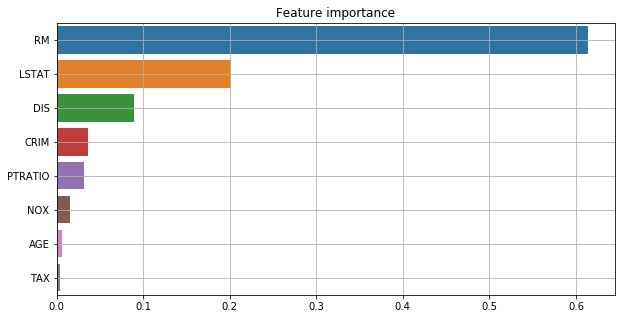

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(best_features.values, best_features.index)
plt.title('Feature importance')
plt.grid()
plt.show()

## Построим регрессию, используя метод ближайших соседей

In [14]:
knn = KNeighborsRegressor()
params = {'n_neighbors' : list(np.arange(2, 21)),
         'p': [1, 2, 4, 6, 8, 10]}

gs_knn = GridSearchCV(knn, params, scoring='r2', cv = 5)

In [15]:
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'p': [1, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [16]:
gs_knn.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=1,
          weights='uniform')

In [18]:
knn_final = gs_knn.best_estimator_
knn_final.fit(X_train, y_train)
print('KNN-regressor: R^2 = {:.4f}'.format(r2_score(y_test, knn_final.predict(X_test))))

KNN-regressor: R^2 = 0.8966
